In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 팁 데이터

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 범주형 데이터열 분석

In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [6]:
tips.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [ ]:
tips.sex.value_counts()

In [8]:
tips.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [3]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [11]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [13]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

* 범주형 데이터 분석을 할 수 있는 열은 아래와 같다.
    * 'sex', 'smoker', 'day', 'time', 'size'

# 총금액과 팁의 상관관계를 분석

<Axes: xlabel='total_bill', ylabel='tip'>

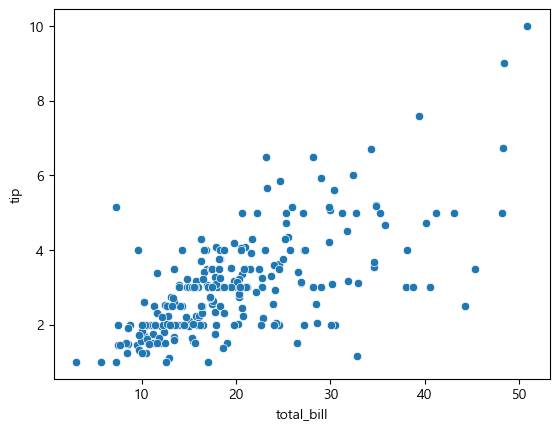

In [4]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

# 그룹별 세부분석

### time

<Axes: xlabel='total_bill', ylabel='tip'>

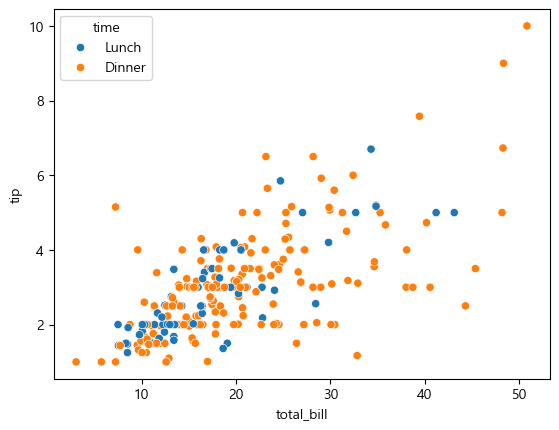

In [15]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

### 차트에서 얻은 인사이트

* 고가의 팁과 총금액은 저녁 타임에서 발생된다.
* 점심식사 매출의 50% 이상이 10~20달라 구간에 발생된다. 그에 비해 저녁식사 매출은 보다 광범위하게 일어났다.

#### 스타일 추가

<Axes: xlabel='total_bill', ylabel='tip'>

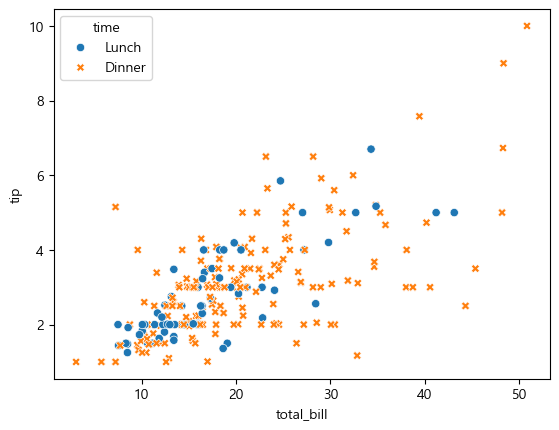

In [16]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='time')

### 그룹 세분화

In [18]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [20]:
# 2개 열 이상 groupby 효과는 hue에서 할 수 없다. 아래 코드는 동작하지 않는다.
#sns.scatterplot(data=tips, x='total_bill', y='tip', hue=['day', 'time'], style='time')

* day로 groupby한 결과에 대해서 time열의 값에 따라 다른 스타일을 지정했기 때문에 결과적으로는  
  day, time 순으로 groupby한 분석결과와 같다.

<Axes: xlabel='total_bill', ylabel='tip'>

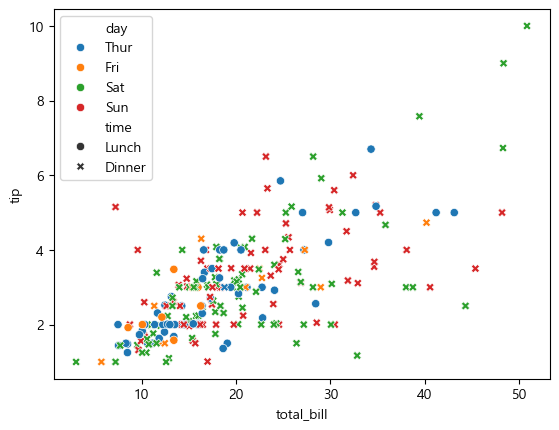

In [21]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time')

### 차트를 보고 얻은 인사이트

* 목요일의 매출은 거의 대부분 점심식사에서 일어난다.
* 금요일은 점심, 저녁 매출이 모두 일어난다.
* 주말의 매출은 거의 대부분 저녁식사에서 일어난다.
* 초고가의 팁은 주로 토요일에 발생한다.
* 특이사항] 일요일에는 팁을 내는 비율이 굉장히 높거나 낮은 결제도 존재한다.

### 인사이트에서 도출되는 비지니스 전략

* 목요일의 매출은 거의 대부분 점심식사에서 일어난다.  
  => 목요일 매출은 평일의 매출로 판단 가능하고 이 때 매출고객은 직장인으로 예상된다.  
   직장인을 대상으로 한 다양한 런치세트 개발이 필요해 보인다.  
  => 매장의 저녁시간은 손님이 없음으로 다른 용도로 활용하는 전략을 검토해 본다. 예) 공간 대여, 매장 점검 등등  
* 금요일은 점심, 저녁 매출이 모두 일어난다.
  => 가장 바쁜 요일이므로 서빙, 주방 인원에 부족함이 없도록 인력관리가 필요  
* 주말의 매출은 거의 대부분 저녁식사에서 일어난다.
  => 주말의 매출고객은 친구, 연인, 가족으로 예상된다.
  각 매출 고객별 다양한 세트 메뉴 개발이 필요해 보인다.
  => 매장의 점심시간은 손님이 없음으로 다른 용도로 활용하는 전략을 검토해 본다. 예) 공간 대여, 매장 점검 등등 
* 초고가의 팁은 주로 토요일에 발생한다.  
  => 특별한 기념일을 위한 다양한 이벤트 상품을 기획한다.
* 특이사항] 일요일에는 팁을 내는 비율이 굉장히 높거나 낮은 결제도 존재한다.  
  => 해당원인에 대한 추가 분석이 필요하다.

# 숫자 타입에 대한 그룹분석

* hue의 인자값이 숫자타입 열이라면 컬러맵을 자동으로 적용해 준다.

In [23]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='total_bill', ylabel='tip'>

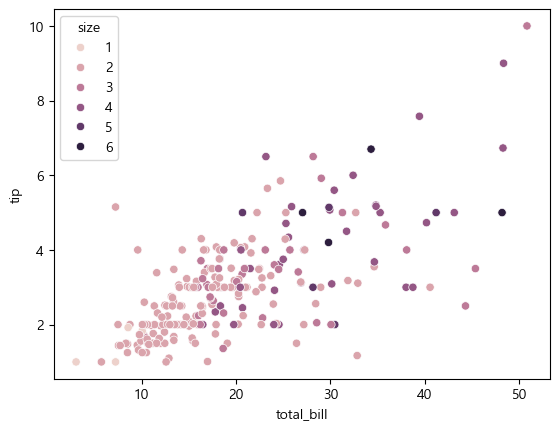

In [24]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size')

* size 옵션 지정하면 size의 크기에 따라 마커의 사이즈가 조정이 된다.

<Axes: xlabel='total_bill', ylabel='tip'>

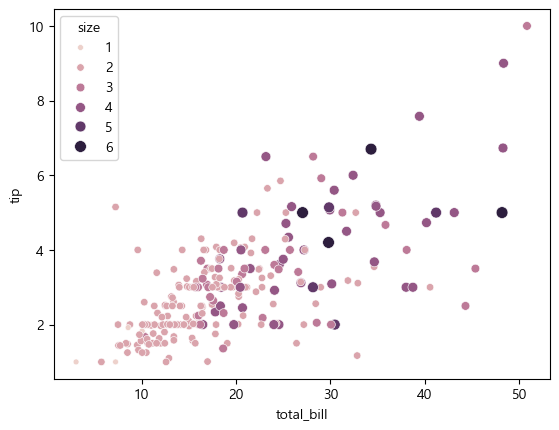

In [25]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', size='size')

#### 인사이트

* 테이블 구성은 아래와 같이 예상됨  
    * 소규모 테이블(1~2인석)
    * 중규모 테이블(3~4인석)
    * 대규모 테이블(5~6인석)
* 전체 매출 중 소규모 > 중규모 > 대규모 순으로 방문 인원이 구성됨
    * 소규모는 안정적인 매출: 회전율을 고려, 소규모를 위한 메뉴 개발이 필요함
    * 중규모, 대규모: 인원수를 고려한 테이블 구조 재배치, 고부가가치를 위한 메뉴 개발이 필요
* 소규모 고객 보다 중규모 이상 고객의 팁 비율이 낮다
    * 중규모 이상 고객의 대한 서비스 개선, 고급화 전략이 필요하다.

In [26]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='total_bill', ylabel='tip'>

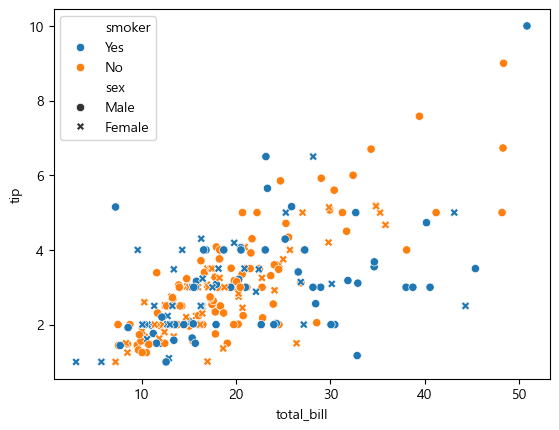

In [28]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', style='sex')

#### 인사이트

* 흡연여부에 따른 Tip의 상관관계는 특별히 보이지 않는다.
    * 흡연 여부에 따른 매장의 매출/팁의 상관관계가 없다. 따라서 차별이 없는 동일한 서비스를 제공한다.
    * 흡연자를 위한 배려 정책을 고려해본다.
        * 흡연공간을 따로 만련
        * 비흡연자를 위한 공간 마련
        * 화장실에 가글, 구강 청결제등 용품 비치한다.

#### 성별

<Axes: xlabel='total_bill', ylabel='tip'>

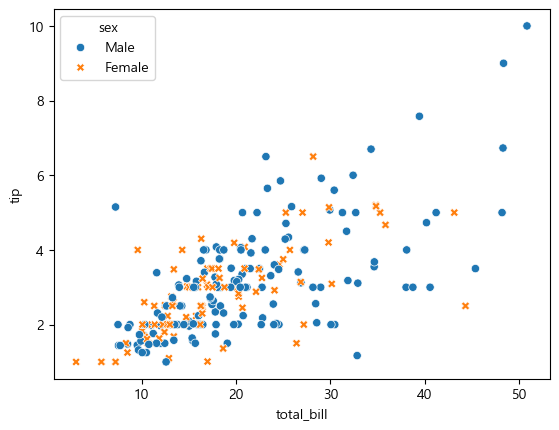

In [33]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='sex')

#### 인사이트

* 고액 매출, 팁은 남성 고객에서 발견되었다.
* 팁의 비율이 극단적으로 높거나 낮은 사례도 남성이다.
* 팁비율이 낮은 사례는 남성에서 보다 많이 발견되었다.  
  => 남성을 고려한 이벤트, 서비스등 배려 및 기획한다.

# 붓꽃 예제

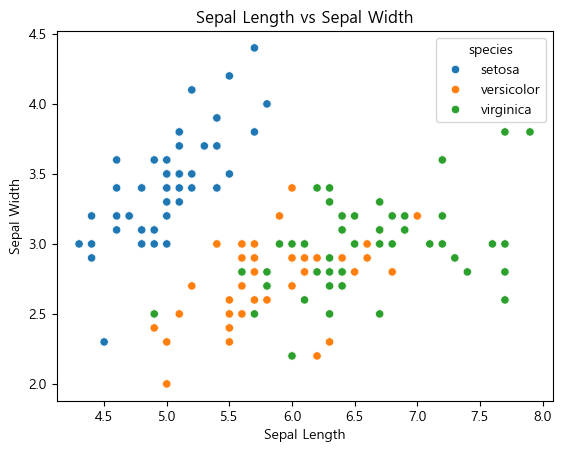

In [34]:
# iris 데이터셋 불러오기
iris = sns.load_dataset('iris')

# 산점도 그리기
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

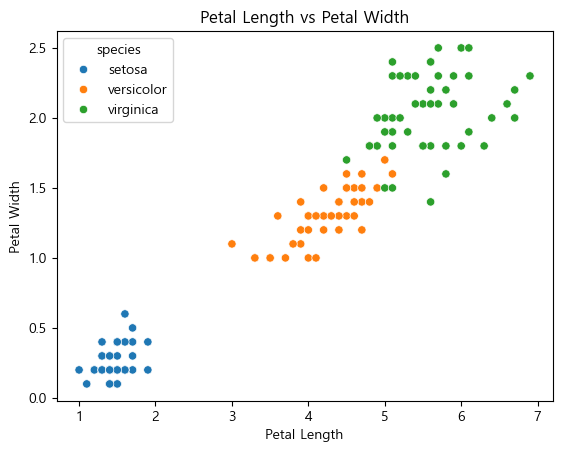

In [36]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

#### 인사이트

* 붓꽃 품종을 구분하기 위한 열의 상관관계는 꽃받침보다는 꽃잎의 길이 너비가 구분하기 용이하다.
    * 이 결과는 versicolor, virginica를 구분하는데 있어 보다 확연히 드러난다.